### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Zhufeng Qiu
    
    Student Number: 6676753248

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    In addition to the Python standard library, this project also requires these packages:
    - numpy, pandas, selenium, BeautifulSoup, requests, basemap, folium
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/ZhufengQiu/inf510_project.
    
    
    

   After downloading the Python files and data files and putting them under the same directory, then we can execute them in command line like this way:
   
   **Scrape and store data**
    
  *1.Scrape data remotely*
    
    - python ZHUFENG_QIU_hw5.py -s remote
    
    - python ZHUFENG_QIU_hw5.py --source=remote
    
        After invoking this code, the ZHUFENG_QIU_hw5.py (main file) will start to call the other four files to scrape data from Websites/API. Then, data will be written to disk first, and ZHUFENG_QIU_hw5.py will read these data files and combine them into a predefined database.
   
        The dataset contains data for April and May 2018.
    
  *2.Scrape data locally*
    
    - python ZHUFENG_QIU_hw5.py -s local
    
    - python ZHUFENG_QIU_hw5.py --source=local
    
        After invoking this code, the ZHUFENG_QIU_hw5.py (main file) will read data files in disk directly and combine them into a predefined database.
     
     
  *3.Scrape test data*
    
    - python ZHUFENG_QIU_hw5.py -s test
    
    - python ZHUFENG_QIU_hw5.py --source=test
    
        The same procedure as scraping data remotely and locally. The difference is that the dataset contains data from May 12, 2018 to May 18, 2018, which is smaller this time.



 **Analysis Part**
 
     This part is showen later in this notebook

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
     1.It takes 5-6 minutes to run the test mode, and 20-30 minutes to run the normal mode, depending on the network speed and CPU.
     
     2.Some names of fields in total_data.csv are kind of confusing, such as "25 total", "25 Less than 9th grade", and etc. Those are data that are scraped by ZHUFENG_QIU_dataset3.py which represents the educational attainment and income level of each district

4.  **Anything else you feel is relevant to the grading of your project your project.**

    The Selenium Library is hard to use because after installing, it still requires to set the driver's path of browser in the Python program manually. (I have written the installation method in the README file on GitHub and Milestone2)

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    The project produces a database of crime information, income information, and educational information. On this basis, the relationship between the crime rate and income/education level is analyzed. At the same time, this project will analyze crime trends related to income, education, location (region), time, and crime categories. Then visualize these results with maps. Through this project, we will achieve some qualitative analysis of crime and provide a certain degree of prediction.
    
    It is worth mentioning that predicting crime occurrence (when, where, and which category) is not implemented, which is contained in Milestone1. Instead, I add a new heatmap on crime distribution to finish this project.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    The results of this project are the visualization of crime data, including:
    
     - 1 analyze crime by category
     
     - 2 count and visualize crime by time (week/hour)
     
     - 3 visualize crime by district
     
     - 4 visualize crime by educational attainment
     
     - 5 visualize crime by income level
     
     - 6 geographical visualization
     
     - 6.1 visualize all crimes on the map by using latitude, longitude, zip code, and ArcGIS server
     
     - 6.2 heatmap
     
     The visual results are shown later in this notebook.

7. **What difficulties did you have in completing the project?**  

    First, The selenium package simulates human clicks to turn pages, so it is incredibly inefficient, so I only selected one month of criminal records (8855 rows) to scrape.
    
    Second, The implementation of selenium library is also difficult because the HTML DOM of the page will change every time after page-turning, so I need to write many scripts to grab data for each page, which significantly increases the workload.
    
     Third, the price of Google map geocoding API is changed from the original free to pay-per-time, which is also why I only selected a part of data

8. **What skills did you wish you had while you were doing the project?**

    I wish I was familiar with the selenium library before. Learning this library takes up a lot of my time. Besides, for the analysis part, I hope I had a solid foundation for data analysis.

9. **What would you do “next” to expand or augment the project?**

    I will add more fields to enhance my dataset. For example, I could manually divide San Francisco into some regions and then analyze the crime information for each region. In addition, I also hope that by strengthening my ability to analyze data, I could process data more diversely in the future.

# Analysis Part

### Import Packages

In [159]:
#Before running the following code, implement these codes in command line to download Basemap and folium library:
#$ conda install -c anaconda basemap
#$ conda install -c conda-forge folium
#$ conda install -c conda-forge/label/gcc7 folium
#$ conda install -c conda-forge/label/cf201901 folium

In [148]:
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import HeatMap

### Read Data

In [150]:
data = pd.read_csv("total_data.csv")

In [151]:
#Data Preview
data.head()

Unnamed: 0  IncidntNum       Category  \
0           0   180362289  VEHICLE THEFT   
1           1   180360835        ROBBERY   
2           2   180360835  DRUG/NARCOTIC   
3           3   180360700  LARCENY/THEFT   
4           4   180360465      VANDALISM   

                                Descript DayOfWeek        Date   Time  \
0                      STOLEN MOTORCYCLE   Tuesday  05/15/2018  10:30   
1                  ROBBERY, BODILY FORCE   Tuesday  05/15/2018  01:25   
2  POSSESSION OF NARCOTICS PARAPHERNALIA   Tuesday  05/15/2018  01:25   
3           GRAND THEFT FROM LOCKED AUTO    Monday  05/14/2018  21:30   
4          MALICIOUS MISCHIEF, VANDALISM    Monday  05/14/2018  20:42   

  PdDistrict      Resolution                   Address  ...  \
0   SOUTHERN            NONE    700 Block of TEHAMA ST  ...   
1   SOUTHERN  ARREST, BOOKED         0 Block of 6TH ST  ...   
2   SOUTHERN  ARREST, BOOKED         0 Block of 6TH ST  ...   
3   SOUTHERN            NONE       11TH ST / FOLSOM ST  ...   
4   SOUTHERN            NONE  1100 Block of MISSION ST  ...   

   Mean household income  Median family income Mean family income  \
0                 102297                 59868             109758   
1                 102297                 59868             109758   
2                 102297                 59868             109758   
3                 102297                 59868             109758   
4                 102297                 59868             109758   

   Per capita income  Median nonfamily income  Mean nonfamily income  \
0              55807                    44853                  97622   
1              55807                    44853                  97622   
2              55807                    44853                  97622   
3              55807                    44853                  97622   
4              55807                    44853                  97622   

   Median earnings for workers  Civilian noninstitutionalized population  \
0                        50216                                     26636   
1                        50216                                     26636   
2                        50216                                     26636   
3                        50216                                     26636   
4                        50216                                     26636   

   With health insurance coverage  No health insurance coverage  
0                           24626                          2010  
1                           24626                          2010  
2                           24626                          2010  
3                           24626                          2010  
4                           24626                          2010  

[5 rows x 46 columns]

### 1 analyze crime by category

In [152]:
record_count_by_category =pd.DataFrame(data.groupby("Category").size().sort_values(ascending=False).rename("counts").reset_index())
print(record_count_by_category)

                       Category  counts
0                 LARCENY/THEFT    2362
1                OTHER OFFENSES    1138
2                  NON-CRIMINAL    1043
3                       ASSAULT     970
4                     VANDALISM     549
5                      BURGLARY     412
6                      WARRANTS     324
7                SUSPICIOUS OCC     320
8                 DRUG/NARCOTIC     278
9                 VEHICLE THEFT     248
10               MISSING PERSON     221
11                      ROBBERY     203
12              SECONDARY CODES     144
13                        FRAUD     126
14                  WEAPON LAWS     120
15                     TRESPASS     113
16       SEX OFFENSES, FORCIBLE      76
17              STOLEN PROPERTY      34
18       FORGERY/COUNTERFEITING      25
19                  DRUNKENNESS      21
20           DISORDERLY CONDUCT      20
21  DRIVING UNDER THE INFLUENCE      17
22                   KIDNAPPING      17
23                        ARSON      16


### 2 count and visualize crime by time (week/hour)

In [153]:
#Extract the hour from "Time" field
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

Text(0.5, 1.0, 'Count crimes by hour of day')

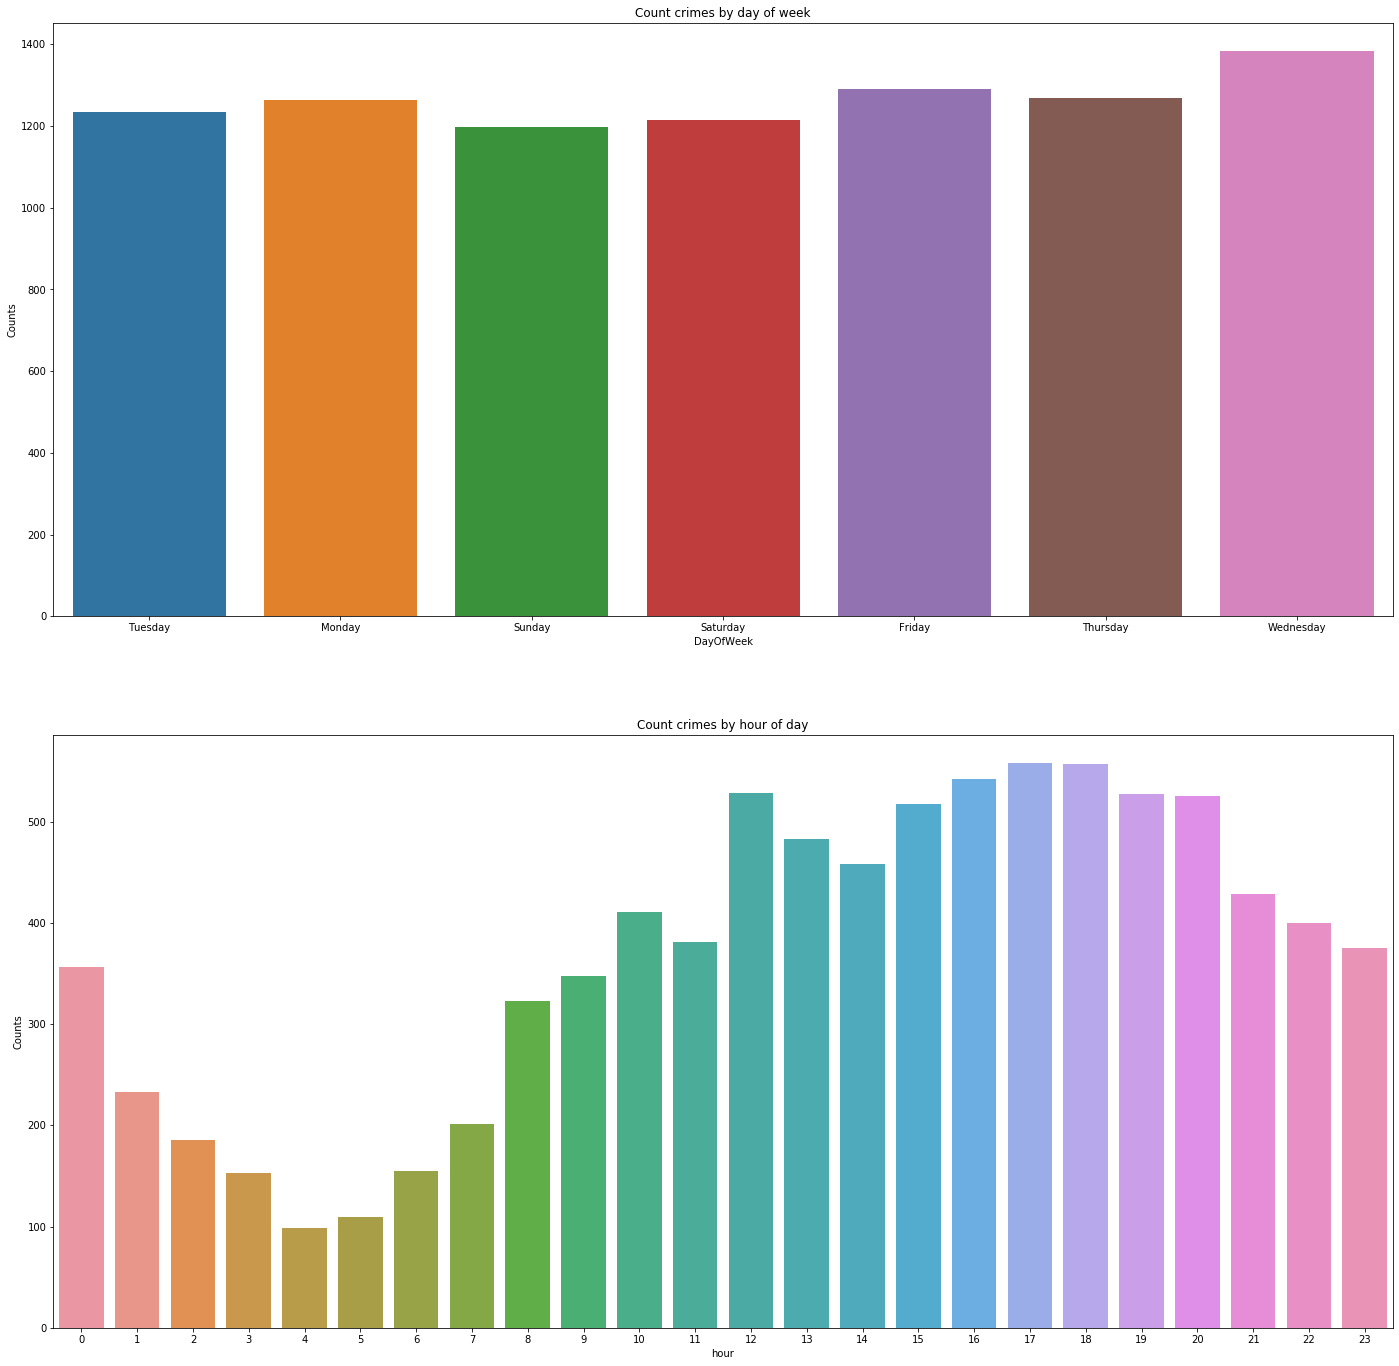

In [154]:
#Count and visualize crime by time (week/hour)
figure,(ax1, ax2)=plt.subplots(2,1,figsize=(24,24))

sns.countplot(x="DayOfWeek",data=data,ax=ax1)
ax1.set_ylabel("Counts")
ax1.set_title("Count crimes by day of week")

sns.countplot(x="hour",data=data,ax=ax2)
ax2.set_ylabel("Counts")
ax2.set_title("Count crimes by hour of day")

### 3 visualize crime by district
### 4 visualize crime by educational attainment 
### 5 visualize crime by income level

In [155]:
def precent_edu(row):
    if row["25 Total"] - row["25 Less than 9th grade"] - row["25 9th to 12th grade"] >=0:
        return (row["25 Total"] - row["25 Less than 9th grade"] - row["25 9th to 12th grade"]) / row["25 Total"]
    else:
        return 0
    
data["Education attainment"] = data.apply(precent_edu ,axis=1)

[Text(0, 0, '0.0'),
 Text(0, 0, '0.6347150259067358'),
 Text(0, 0, '0.7137851397626822'),
 Text(0, 0, '0.7422688936662808'),
 Text(0, 0, '0.7501443610358459'),
 Text(0, 0, '0.761976431407711'),
 Text(0, 0, '0.7905522804840212'),
 Text(0, 0, '0.8197875734350076'),
 Text(0, 0, '0.8468914052670398'),
 Text(0, 0, '0.8727866274697478'),
 Text(0, 0, '0.8731358698137976'),
 Text(0, 0, '0.8808510638297873'),
 Text(0, 0, '0.8915522907403828'),
 Text(0, 0, '0.8938863934491394'),
 Text(0, 0, '0.894537643207856'),
 Text(0, 0, '0.8951211798867262'),
 Text(0, 0, '0.9125789068514242'),
 Text(0, 0, '0.9163555645242659'),
 Text(0, 0, '0.9202663269080597'),
 Text(0, 0, '0.9225130890052357'),
 Text(0, 0, '0.9338118022328549'),
 Text(0, 0, '0.9503802200603254'),
 Text(0, 0, '0.9699997137377265'),
 Text(0, 0, '0.9739085868704281'),
 Text(0, 0, '0.9761049349240781')]

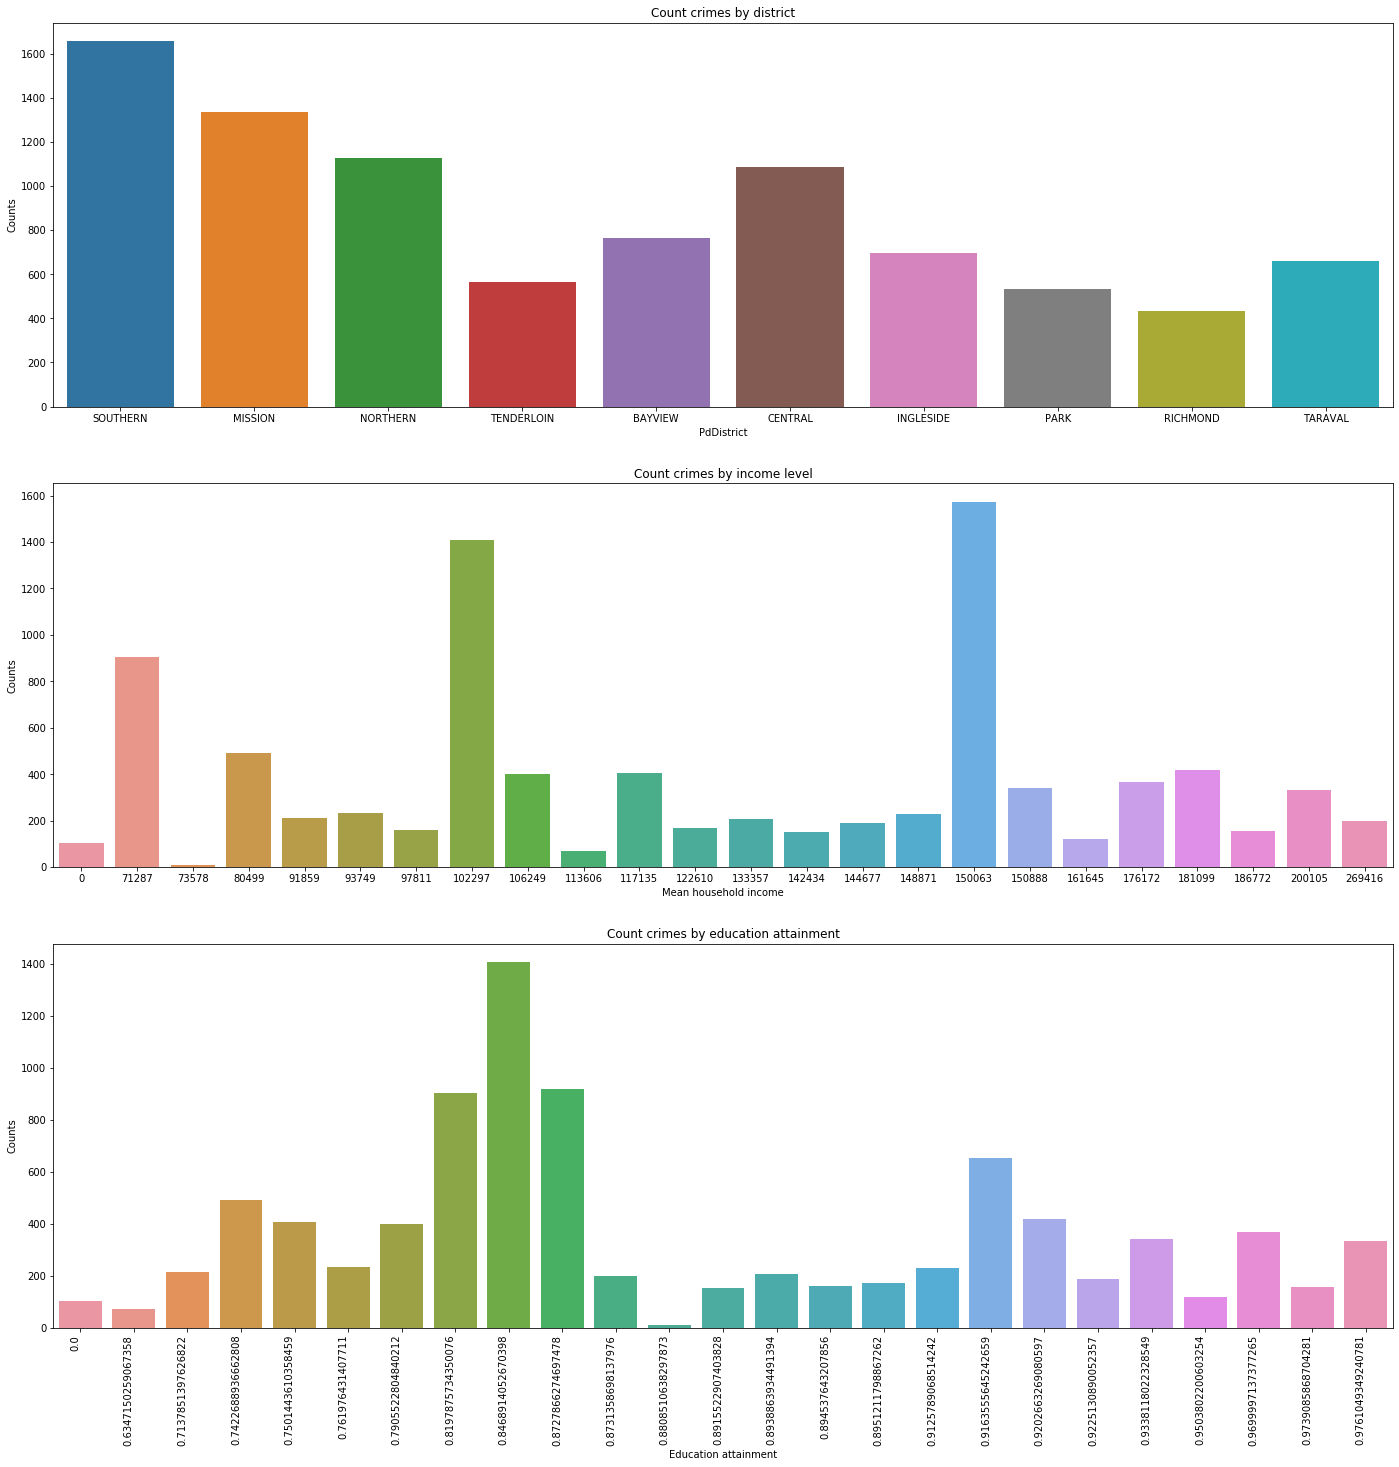

In [156]:
#Count and visualize crime by time (week/hour)
figure,(ax1, ax2, ax3)=plt.subplots(3,1,figsize=(24,24))

sns.countplot(x="PdDistrict",data=data,ax=ax1)
ax1.set_ylabel("Counts")
ax1.set_title("Count crimes by district")

sns.countplot(x="Mean household income",data=data,ax=ax2)
ax2.set_ylabel("Counts")
ax2.set_title("Count crimes by income level")

sns.countplot(x="Education attainment",data=data,ax=ax3)
ax3.set_ylabel("Counts")
ax3.set_title("Count crimes by education attainment")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right")

### 6 geographical visualization
     
### 6.1 visualize all crimes on the city's map by using geographcial information

/Users/zephyryau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=1601619.820954019,975969.4513253421,1615220.2369981667,987802.3930406559&bboxSR=2770&imageSR=2770&size=1800,1566&dpi=96&format=png32&transparent=true&f=image


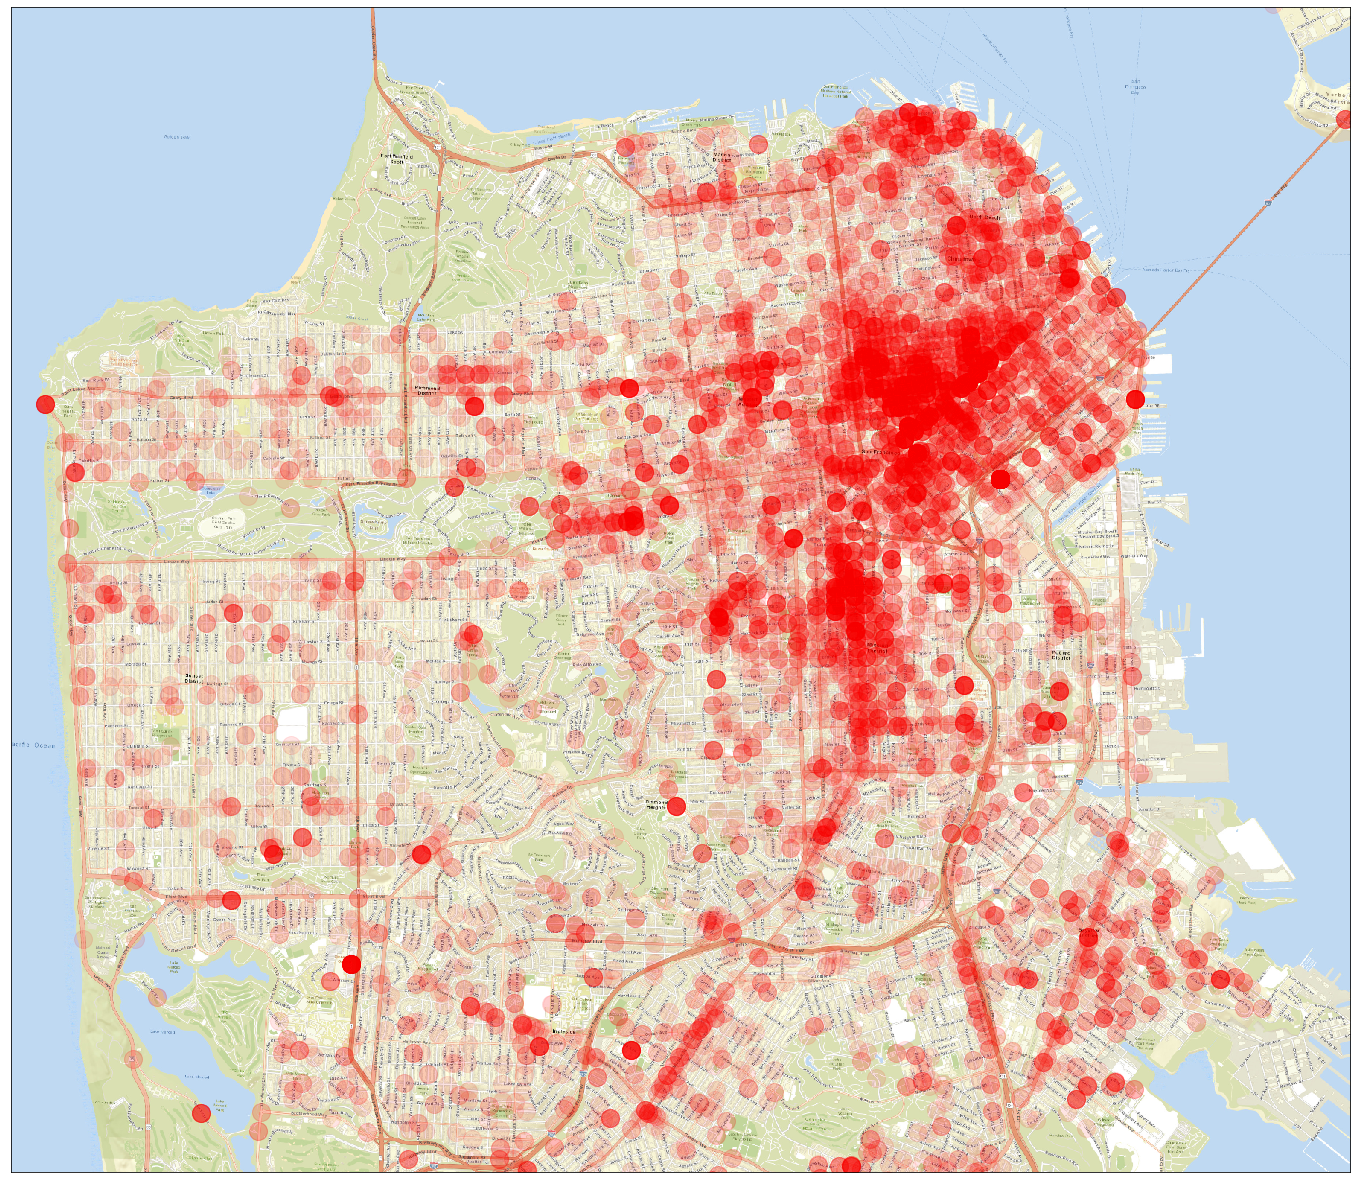

In [157]:
m = Basemap(projection='mill',llcrnrlat=data.lat.min(),urcrnrlat=data.lat.max(),llcrnrlon=data.lng.min(),urcrnrlon=data.lng.max(),resolution="c",epsg=2770)
x,y= m(tuple(data.lng),tuple(data.lat))

plt.figure(figsize=(24,24))
m.arcgisimage(service="World_Street_Map",xpixels=1800,verbose=True)
m.plot(x,y,'o',markersize=18,alpha=0.1,color='red')

### 6.2 Heatmap

In [158]:
m = folium.Map(location=[37.76, -122.44],width=580, height=580,zoom_start=12)
m_data = [[row['lat'], row['lng']] for index, row in data.iterrows()]
HeatMap(m_data, radius = 11).add_to(m)
m